# Superstore Dataset

## Import Libraries

In [587]:
# import necessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import plotly.subplots as sp
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [588]:
# checking for the encoding
import chardet

data_path = 'D:\Project\superstore.csv'
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [589]:
# load the data
df = pd.read_csv(data_path, encoding=result['encoding'])
# print(df)

In [590]:
df.columns.unique()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [591]:
# Check unique values for selected columns
for feature in ['Segment', 'Country', 'State', 'Region', 'Category', 'Sub-Category', 'Ship Mode']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

Segment 3 unique values are: ['Consumer' 'Corporate' 'Home Office']
Country 1 unique values are: ['United States']
State 49 unique values are: ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
Region 4 unique values are: ['South' 'West' 'Central' 'East']
Category 3 unique values are: ['Furniture' 'Office Supplies' 'Technology']
Sub-Category 17 unique values are: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Applian

In [592]:
# drop unused columns
df = df.drop(columns=['Ship Date', 'Ship Mode', 'Country', 'Postal Code', 'Row ID', 'Customer Name'])
df.head()

,Order ID,Order Date,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [593]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Customer ID   9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   City          9994 non-null   object 
 5   State         9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Product ID    9994 non-null   object 
 8   Category      9994 non-null   object 
 9   Sub-Category  9994 non-null   object 
 10  Product Name  9994 non-null   object 
 11  Sales         9994 non-null   float64
 12  Quantity      9994 non-null   int64  
 13  Discount      9994 non-null   float64
 14  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


In [594]:
# convert df['Order Date] to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Customer ID   9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Product ID    9994 non-null   object        
 8   Category      9994 non-null   object        
 9   Sub-Category  9994 non-null   object        
 10  Product Name  9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   int64         
 13  Discount      9994 non-null   float64       
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [595]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,NaN,NaN,NaN,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9994,49,California,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9994,4,West,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product ID,9994,1862,OFF-PA-10001970,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9994,3,Office Supplies,6026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9994,17,Binders,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [596]:
#check missing value
df.isnull().values.any()

False

In [597]:
# check duplicates
dup = df.loc[df.duplicated()]
dup

,Order ID,Order Date,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,LB-16795,Home Office,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [598]:
# drop the duplicates
df = df.drop_duplicates()

## EDA

### Sales by Category


In [599]:
#Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

fig_sales_by_category = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_sales_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_sales_by_category.update_layout(title_text='Sales by Category', title_font=dict(size=30))

fig_sales_by_category.show()

#### Observations:
- The sales for the three categories namely technology, furniture and office supplies are almost similar.
- Technology is having the higest sales, accounting for 36.4% from the total sales, followed by furniture at 32.3% and office supplies has the least sales at 31.3%.

### Profit By Category

In [600]:
#Which category are the most profitable?
#Profit by category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

fig_profit_by_category = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_by_category.update_layout(title_text='Profit by Category', title_font=dict(size=30))

fig_profit_by_category.show()

#### Observations: 
From the pie chart, it can be observed that the technology products is the most profitable, accounting for 50.8% of the total profits, followed by office suppplies at 42.8% and furniture products (6.45%) is the least profitable. 

### Profit by Region

In [601]:
#Which region are performing the best/worst?
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

fig_profit_by_region= px.pie(profit_by_region, 
             values='Profit', 
             names='Region', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_by_region.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_by_region.update_layout(title_text='Profit by Region', title_font=dict(size=30))

fig_profit_by_region.show()


#### Observations: From the pie chart, 
It can be observed that the West Region is the most profitable accounting for 37.9% of the total profit, followed by East Region and South Region at 32% and 16.3% respectively, whereas Central region is the least profitable by only accounting for 13.9% of the total profit. 

### Distribution of (category feature) and Sales in cluster column chart.  

###

In [602]:
# sales by subcategory
df_subcat_sales = df.copy()

df_subcat_sales['Sub-Category'] = df_subcat_sales['Sub-Category'].astype(str)
df_subcat_sales = df_subcat_sales.groupby(['Sub-Category', 'Category'], as_index=False)['Sales'].sum()

# sort data by sales in descending order
df_subcat_sales = df_subcat_sales.sort_values(by='Sales', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_sales = px.bar(df_subcat_sales, x='Sub-Category', y='Sales', 
                 barmode='stack', color='Category', 
                 title='Sales by Sub-Category')
fig_subcat_sales.update_layout(showlegend=True, title_font=dict(size=30))

fig_subcat_sales.show()

#### Observations:
- For the sales in technology category, phones ranked at first, followed by machines, accessories and copiers.
- For the sales in furniture category, chairs is having the most sales, tables ranked second and followed by bookcase, whereas furnishings ranked last.
- For the sales in offcie supplies, storage ranked first, followed by binders, appliances, paper, supplies, art, envelopes, labels and fasteners.

### Distribution of (category feature) and Profit in cluster column chart.   

In [603]:
# sales by subcategory
df_subcat_profit = df.copy()

df_subcat_profit['Sub-Category'] = df_subcat_profit['Sub-Category'].astype(str)
df_subcat_profit = df_subcat_profit.groupby(['Sub-Category', 'Category'], as_index=False)['Profit'].sum()

# sort data by sales in descending order
df_subcat_profit = df_subcat_profit.sort_values(by='Profit', ascending=False)

# Column chart for overall sales by sub-category
fig_df_subcat_profit = px.bar(df_subcat_profit, x='Sub-Category', y='Profit', 
                 barmode='stack', color='Category', 
                 title='Profit by Sub-Category')
fig_df_subcat_profit.update_layout(showlegend=True, title_font=dict(size=30))

fig_df_subcat_profit.show()

#### Observations:
- For the profit in technology category, copiers is the most profitable, followed by phones, accessories and machines is the least profitable.
- For office supplies and furniture category, the products can be categorised into two category: Profitable and loss.
- For office supplies, paper is the most profitable, followed by binders, storage, appliances, envolopes, art, lables, fasteners and supplies. Out of these products, supplies is making a loss whereas all others products are profitable.
- For furniture, chairs, chairs is the most profitable, followed by furnishings, bookcases and tables. Out of these products, bookcases and tables are making loss, whereas chairs and furnishings are profitable.


### Profit Margin (%) by Category

Text(0.5, 0, 'Average Profit Margin (%)')

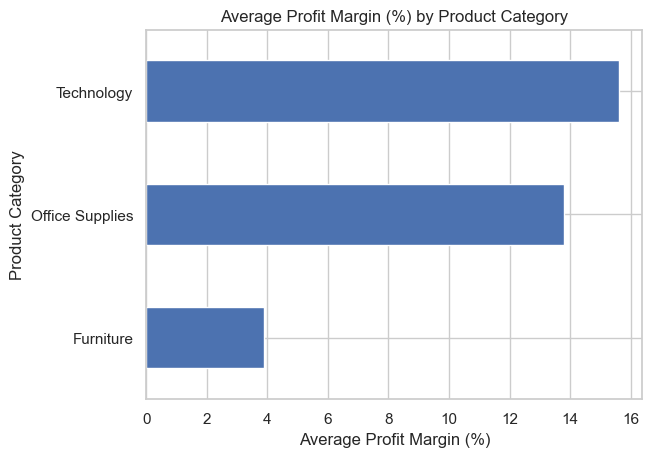

In [604]:
#create a nuw column (Profit Margin by percentage)
df["Profit Margin (%)"] = (df['Profit']/df['Sales'])*100
#Check the average profit margin for each category 
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean()
#Display profit margin by category
avg_profit_margin_by_category.plot(kind='barh')
# Graph title, x axis and y axis labelling
plt.title("Average Profit Margin (%) by Product Category")
plt.ylabel("Product Category")
plt.xlabel("Average Profit Margin (%)")

#### Observations:
- The average profit margin for technology products is the highest, followed by office supplies, and the furniture is the category with least average profit margin.

In [605]:
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean()

print(avg_profit_margin_by_category)

Category
Furniture           3.882204
Office Supplies    13.803029
Technology         15.613805
Name: Profit Margin (%), dtype: float64


### Profit Margin (%) by Sub-Category

In [625]:
df_grouped = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'})
df_grouped['Profit Margin (%)'] = df_grouped['Profit'] / df_grouped['Sales'] * 100

# Reset index to make category and sub-category columns
df_grouped.reset_index(inplace=True)
df_subcat_profit_margin = df_grouped.copy()
df_subcat_profit['Sub-Category'] = df_subcat_profit['Sub-Category'].astype(str)
df_subcat_profit_margin = df_subcat_profit_margin.sort_values(by='Profit Margin (%)', ascending=False)

# Create a vertical stacked bar chart
fig = px.bar(df_subcat_profit_margin, x='Sub-Category', y='Profit Margin (%)', color='Category', barmode='stack')


# Set title and axis labels
fig.update_layout(title='Profit Margin by Sub-Category', xaxis_title='Category', yaxis_title='Profit Margin (%)')

# Show plot
fig.show()

#### Observations:
- From the bar graph, it can be observed that office supplies is having the highest profit margin, followed by technology products and furniture.
- For office supplies, labels are generating the highest profit margin, followed by paper, envelopes, fasteners, art, appliances, binders, storage and supplies. Supplies is the only products in the office supplies category that undergo losses.
- For technology product, all the products are having positive profit margin. Copiers is having the highest profit margin, followed by accessories, phones and machines.
- For furniture, furnishings is having the highest profit margin, follow by chairs and bookcases and tables. Furnishings and chairs are having the positive profit margin while bookcases and tables are having negative profit margin.

In [626]:
#Profit Margin by customer segment
profit_margin_by_category = df.groupby('Segment')['Profit Margin (%)'].sum().reset_index()

fig_profit_margin_by_category= px.pie(profit_margin_by_category, 
             values='Profit Margin (%)', 
             names='Segment', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_margin_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_margin_by_category.update_layout(title_text='Profit Margin (%) by Customer Segment', title_font=dict(size=30))

fig_profit_margin_by_category.show()

#### Observations:
- From pie chart, it can be noticed the consumer segment is generating the highest profit margin, accounting for 48.4%, followed bu corporate at 30.4% and home office (21.2%).

In [627]:
df_hist_sub = df.copy()

# # Create subplots with 5 rows and 3 columns
# fig1 = make_subplots(rows=5, cols=3)
df_hist_sub = df_hist_sub.drop(columns=['Product Name', 'Order ID', 'Product ID', "Customer ID"])
columns_to_plot = df_hist_sub.columns[:15]
data_to_plot = df_hist_sub[columns_to_plot]
num_subplots = len(columns_to_plot)

# Specify the number of columns, rows
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols

fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns_to_plot)

# Loop through the columns and create histograms for each column
for i, column in enumerate(columns_to_plot):
    # Calculate the row and column indices for the subplot
    row = i // 3 + 1
    col = i % 3 + 1
    

    fig.add_trace(go.Histogram(x=data_to_plot[column], nbinsx=150, name=column), row=row, col=col)

# Update subplot layout
fig.update_layout(
    title="Histograms of Superstore Data",
    showlegend=False,
    height=1750,
    width=1280
)

# Show plot
fig.show()

#### Observations:
- From the histogram, it can be revealed the distribution of the data obtain for each feature.
- For Segment, it can be observed that the highest frequency of values for this variable is found in the consumer segment, followed by corporate and home office. 
- For City, Henderson is having the highest frequecy of the frequency of values for this variable.
- For State, Kentucky is having the highest frequency and followed by New York.
- For Region, West Region is having the highest frequency of values, followed by East, Central and South region.
- For Category, office supplies is having highest frequency of values, followed by furniture and technology.
- For Sub Category, binders is having the highest frequency of value and followed by accesories.
- For Sales, the distribution is right-skewed, where sales that approaching 0 is having the highest frequency.
- For Quantity, the distribution is right-skewed, where quantity that is in between of 0 and 5 is having the highest frequency.
- For Discount, 0 is having the highest frequency of value and followed by 0.2.
- For Profit, profit that is approaching 0 is having the highest frequency of value.
- For Profit margin, the distribution is right-skewed.